#Tendencias de uso de energías sostenibles por país 
- ¿Cuáles son las tipos de energías que hay y qué países las ocupan?
- Top 10 países y que energías que se ocupan 
- Relación de acceso de electricidad VS GDP
- Acceso a la electricidad vs población
- Predicción de uso de energía sostenible
- Categorize regions for infrastructure development, understand sustainable energy's role.

#Emisión de CO2 por país BRICSM vs G7
- Porcentaje para cocinar de países
- Forecast CO2 emissions, support climate strategies.
- Evaluate policy impact de CO2 - Acuerdo de París
- Uso de energía fósil vs GDP
- Precio de energía eléctrica en el país
- Uso de carbono hacia energia renovable 

#Países que ocupan energía nuclear vs energia solar
- Analyze access, density, and growth for equitable distribution.
- Guide investors towards sustainable opportunities.
- Eficiencia de cada país de energia nuclear vs energia solar
- Consumo per cápita de electricidad nuclear vs población
- Consumo per cápita de electricidad solar vs población

#Ranking (top 5) de países de energía sostenible vs PIB per cápita
- Identify intensive areas for environmental impact reduction
- Identify regions for green investments based on capacity
- Consumo de electricidad vs crecimiento de PIB
- Electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours
- Electricity generated from nuclear power in terawatt-hours

In [25]:
import requests
import pandas as pd
import os


In [26]:
csv_reader="/Users/kevindorado/Desktop/Project 1/Copia de global-data-on-sustainable-energy (1).csv"
global_data=pd.read_csv(csv_reader)
global_df=pd.DataFrame(global_data)
global_df.dropna()
global_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [27]:
#LEER ESTAMOS FILTRANDO POR TIPO DE ENERGÍA
data= {"Entity":"Country","Year":"Year"}
energy_types_df=pd.DataFrame(global_df.loc[:,["Electricity from fossil fuels (TWh)","Electricity from nuclear (TWh)","Electricity from renewables (TWh)"]])
energy_types_df


,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh)
0,0.16,0.0,0.31
1,0.09,0.0,0.50
2,0.13,0.0,0.56
3,0.31,0.0,0.63
4,0.33,0.0,0.56
...,...,...,...
3644,3.50,0.0,3.32
3645,3.05,0.0,4.30
3646,3.73,0.0,5.46
3647,3.66,0.0,4.58


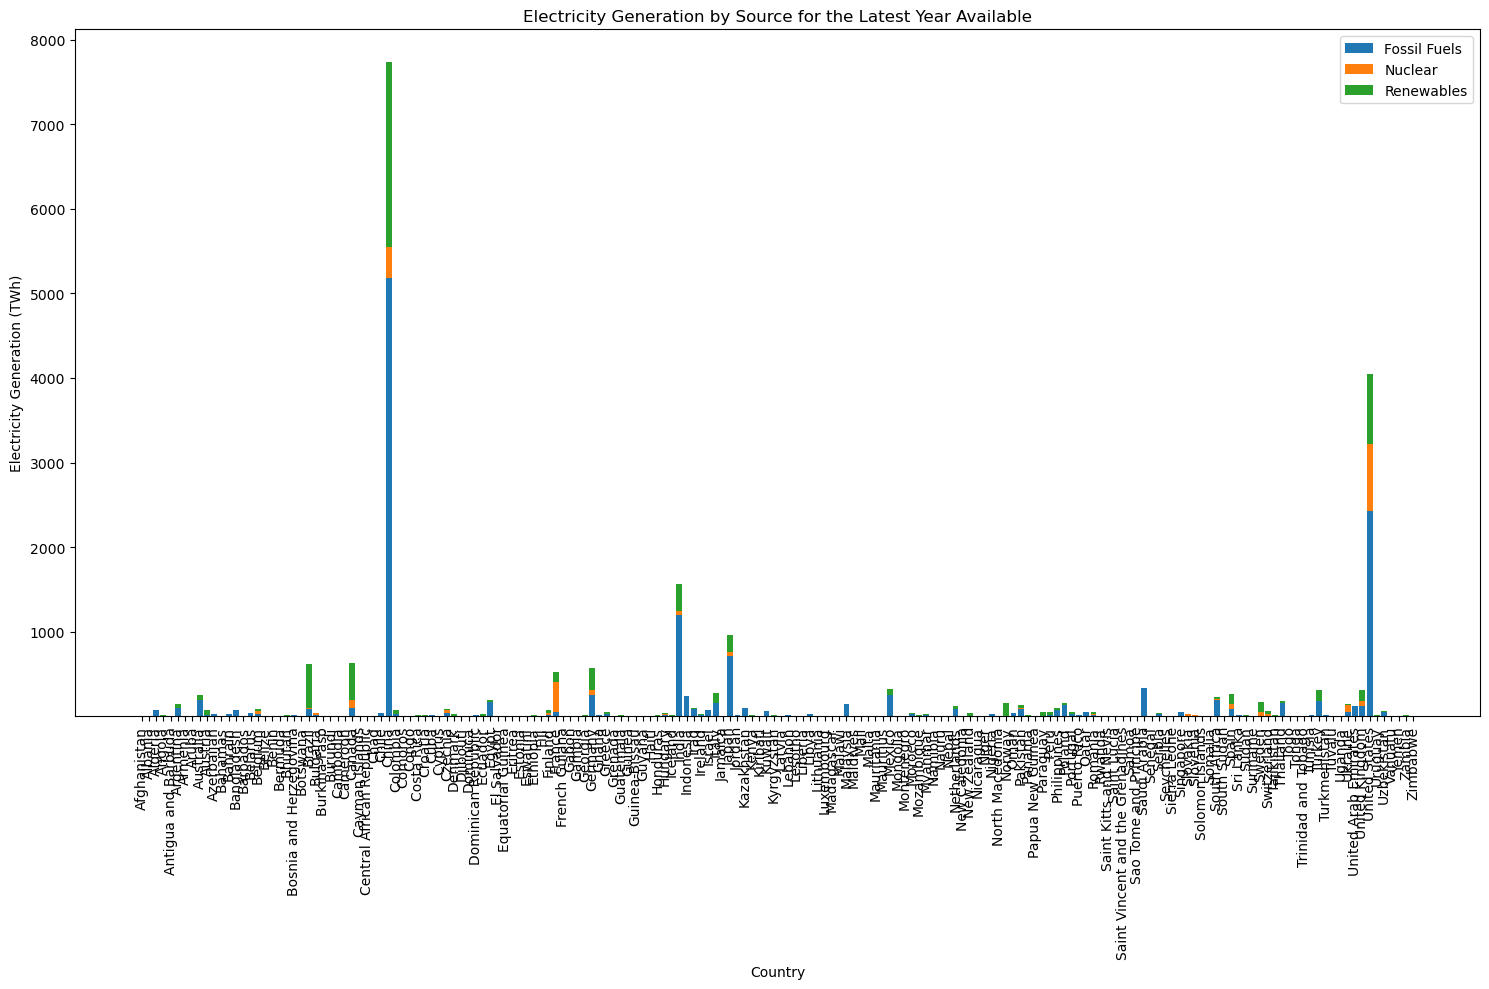

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Asumiendo que ya has leído tu CSV en un DataFrame llamado 'global_df'
# global_df = pd.read_csv('tu_archivo.csv')

# Filtrando por el último año disponible para cada país
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()

# Fusionando para obtener solo las filas del último año de cada país
filtered_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

# Ahora crearemos un gráfico como ejemplo, mostrando la capacidad de generación de electricidad renovable
# Filtraré solo algunas columnas para el ejemplo del gráfico
plot_data = filtered_df[['Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

# Asumiendo que quieres mostrar un gráfico de barras apiladas para cada país
countries = plot_data['Entity']
fossil_fuels = plot_data['Electricity from fossil fuels (TWh)']
nuclear = plot_data['Electricity from nuclear (TWh)']
renewables = plot_data['Electricity from renewables (TWh)']

# Creando el gráfico de barras apiladas
plt.figure(figsize=(15, 10))
plt.bar(countries, fossil_fuels, label='Fossil Fuels')
plt.bar(countries, nuclear, bottom=fossil_fuels, label='Nuclear')
plt.bar(countries, renewables, bottom=fossil_fuels+nuclear, label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation by Source for the Latest Year Available')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para que sean legibles
plt.legend()
plt.tight_layout()  # Ajusta automáticamente los parámetros para dar espacio a las etiquetas
plt.show()


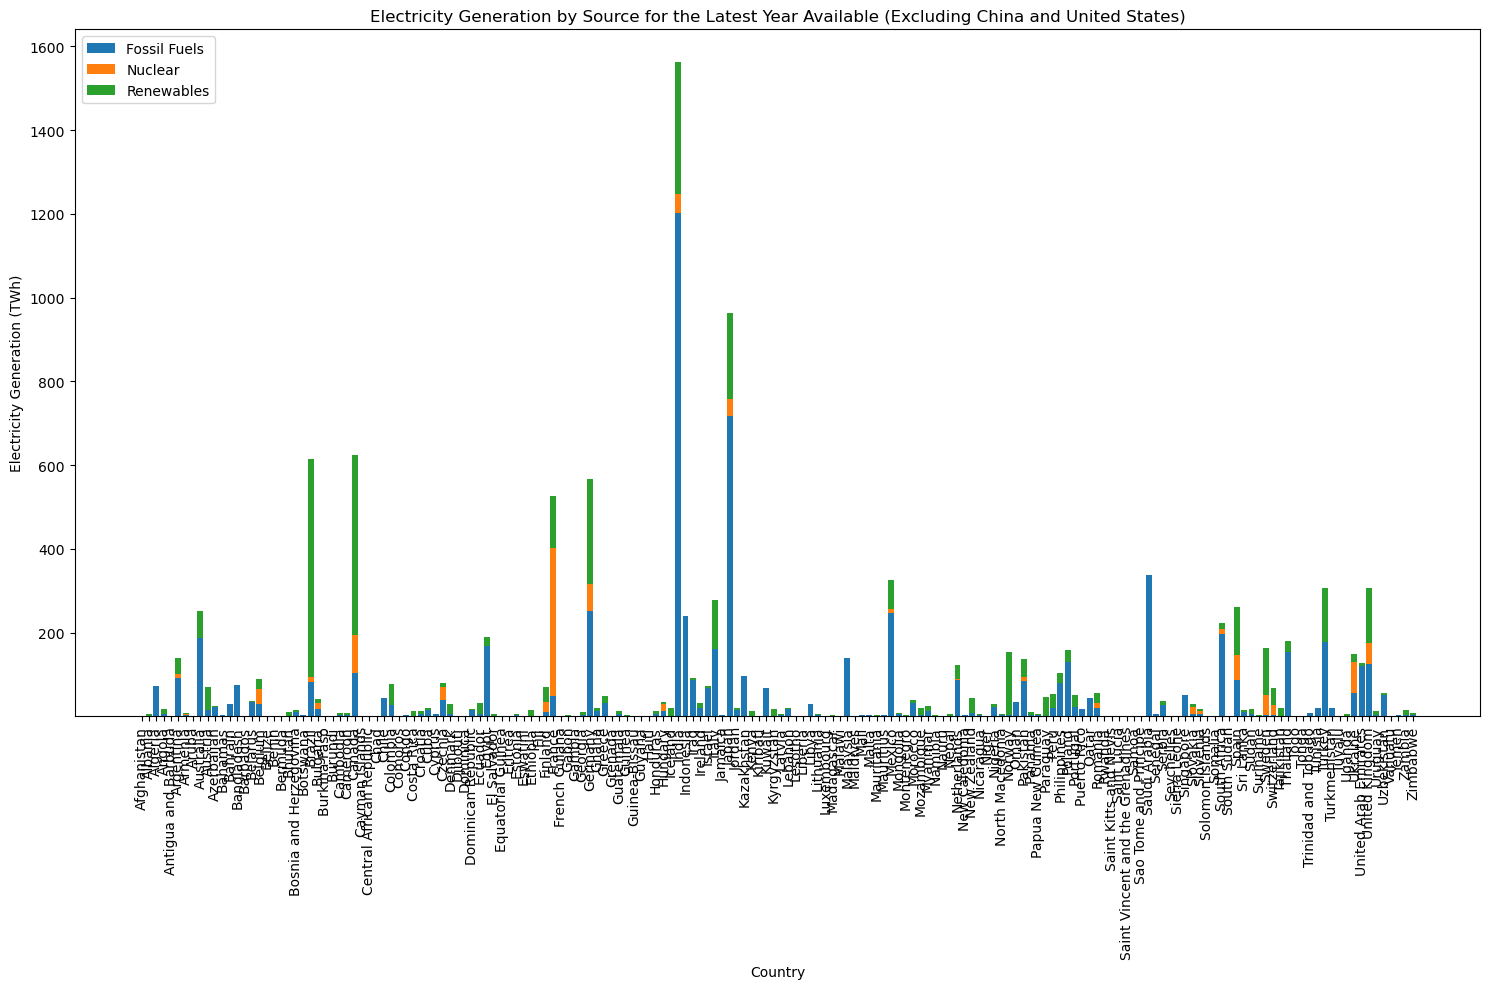

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2020,97.700000,33.20,9.35,NaN,NaN,0.12,0.0,0.68,...,702.8880,NaN,NaN,NaN,-2.351101,516.747871,60,652230.0,33.939110,67.709953
1,Albania,2020,100.000000,81.30,NaN,NaN,NaN,0.00,0.0,5.31,...,11158.0030,NaN,NaN,NaN,-3.955398,5246.292306,105,28748.0,41.153332,20.168331
2,Algeria,2020,99.804130,99.70,15.64,NaN,NaN,72.01,0.0,0.72,...,14933.8070,NaN,NaN,0.297899,-5.100000,3306.858208,18,2381741.0,28.033886,1.659626
3,Angola,2020,46.890610,50.20,115.43,NaN,NaN,4.49,0.0,12.10,...,3527.1600,NaN,NaN,NaN,-5.399987,1776.166868,26,1246700.0,-11.202692,17.873887
4,Antigua and Barbuda,2020,100.000000,100.00,167.98,NaN,NaN,0.31,0.0,0.02,...,27785.2270,NaN,NaN,NaN,-20.192371,13992.744480,223,443.0,17.060816,-61.796428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Uzbekistan,2020,100.000000,84.25,60.02,NaN,NaN,50.93,0.0,5.01,...,15860.6090,NaN,NaN,2.523421,1.714771,1750.697113,79,447400.0,41.377491,64.585262
172,Vanuatu,2020,67.333270,7.60,37.84,NaN,NaN,0.05,0.0,0.02,...,2923.5380,NaN,NaN,NaN,-6.813991,2870.089300,25,12189.0,-15.376706,166.959158
173,Yemen,2020,73.757930,61.50,8.48,NaN,NaN,2.74,0.0,0.49,...,1092.0021,NaN,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388
174,Zambia,2020,44.524475,10.40,138.23,NaN,NaN,2.00,0.0,13.10,...,3099.0830,NaN,NaN,NaN,-2.785055,985.132436,25,752618.0,-13.133897,27.849332


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'global_df' es tu DataFrame principal
# global_df = pd.read_csv('tu_archivo.csv')

# Filtrando por el último año disponible para cada país
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()

# Fusionando para obtener solo las filas del último año de cada país
filtered_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

# Excluyendo a China y Estados Unidos del DataFrame
EGS_source_latestyear_df = filtered_df[~filtered_df['Entity'].isin(['China', 'United States'])]

# Seleccionando los datos para el gráfico
plot_data = EGS_source_latestyear_df[['Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

# Ordenando los datos por país para una mejor visualización
plot_data = plot_data.sort_values('Entity')

# Obteniendo los valores para el gráfico
countries = plot_data['Entity']
fossil_fuels = plot_data['Electricity from fossil fuels (TWh)']
nuclear = plot_data['Electricity from nuclear (TWh)']
renewables = plot_data['Electricity from renewables (TWh)']

# Creando el gráfico de barras apiladas
plt.figure(figsize=(15, 10))
plt.bar(countries, fossil_fuels, label='Fossil Fuels')
plt.bar(countries, nuclear, bottom=fossil_fuels, label='Nuclear')
plt.bar(countries, renewables, bottom=fossil_fuels+nuclear, label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation by Source for the Latest Year Available (Excluding China and United States)')
plt.xticks(rotation=90)  # Rotates the x-axis labels to be readable
plt.legend()
plt.tight_layout()  # Automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

EGS_source_latestyear_df.dropna()
EGS_source_latestyear_df


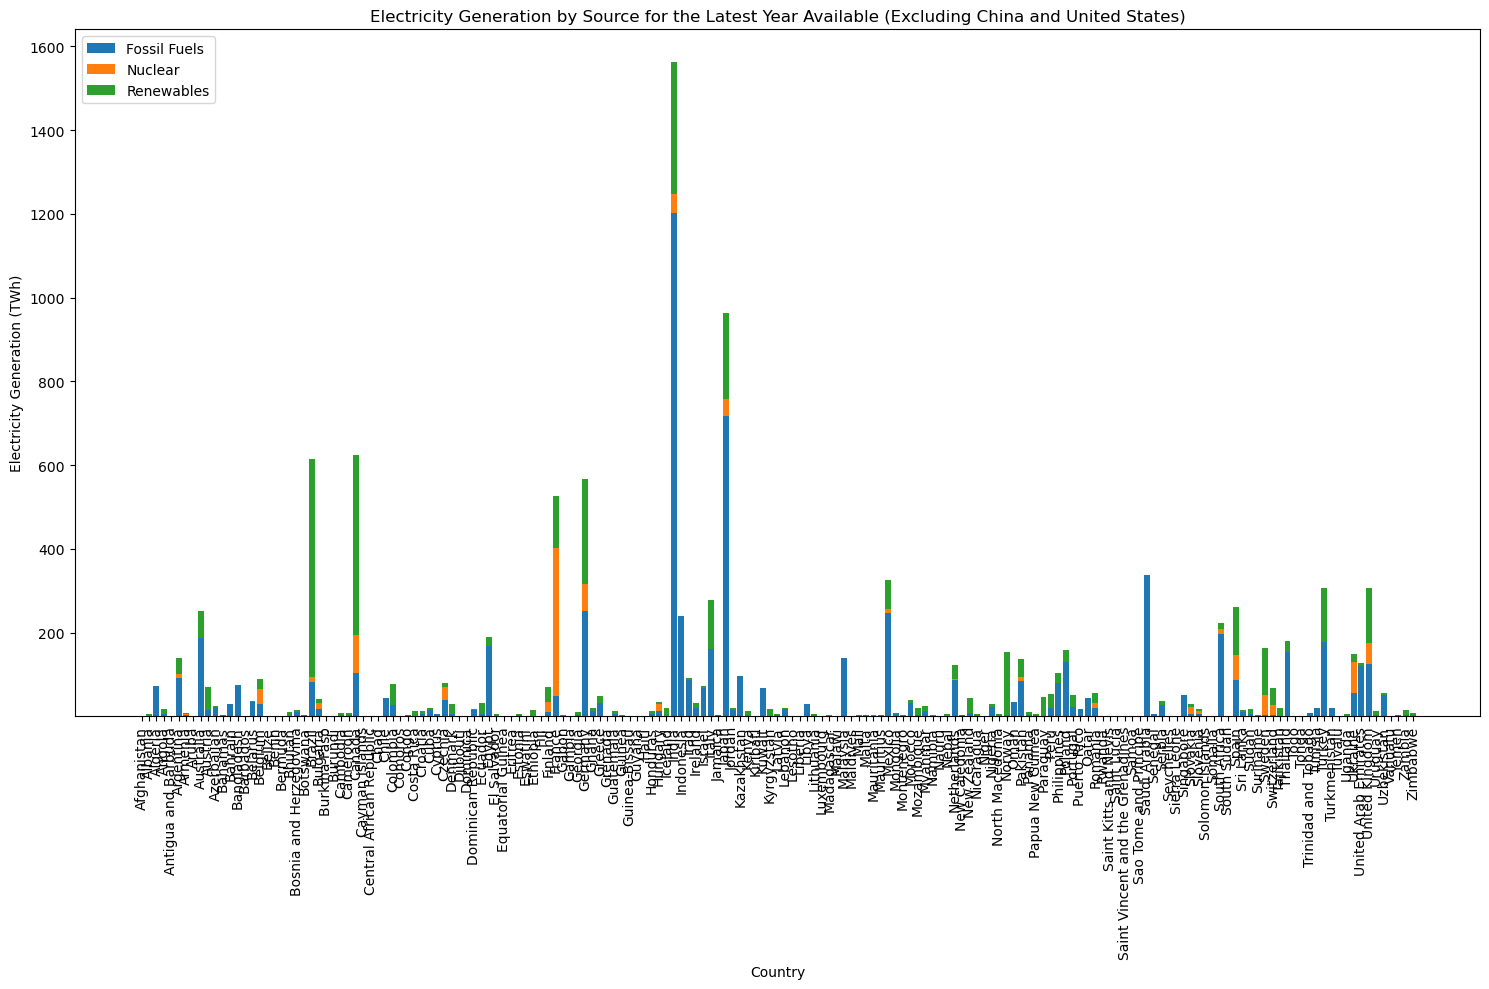

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude,min,max
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,760.0,NaN,NaN,NaN,60,652230.0,33.939110,67.709953,2000.0,NaN
1,Albania,2000,100.000000,38.20,NaN,NaN,NaN,0.14,0.0,4.55,...,3170.0,NaN,6.946217,1126.683340,105,28748.0,41.153332,20.168331,2000.0,NaN
2,Algeria,2000,98.973100,97.10,8.91,NaN,0.43,23.84,0.0,0.05,...,80050.0,0.053235,3.800000,1765.027146,18,2381741.0,28.033886,1.659626,2000.0,NaN
3,Angola,2000,24.212744,41.10,14.37,NaN,73.44,0.50,0.0,0.90,...,16200.0,NaN,3.054624,556.838632,26,1246700.0,-11.202692,17.873887,2000.0,NaN
4,Antigua and Barbuda,2000,97.689260,100.00,0.00,NaN,0.00,0.14,0.0,0.00,...,330.0,NaN,6.203431,10872.292950,223,443.0,17.060816,-61.796428,2000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,Uzbekistan,2020,100.000000,84.25,60.02,NaN,NaN,50.93,0.0,5.01,...,NaN,2.523421,1.714771,1750.697113,79,447400.0,41.377491,64.585262,NaN,2020.0
348,Vanuatu,2020,67.333270,7.60,37.84,NaN,NaN,0.05,0.0,0.02,...,NaN,NaN,-6.813991,2870.089300,25,12189.0,-15.376706,166.959158,NaN,2020.0
349,Yemen,2020,73.757930,61.50,8.48,NaN,NaN,2.74,0.0,0.49,...,NaN,NaN,NaN,NaN,56,527968.0,15.552727,48.516388,NaN,2020.0
350,Zambia,2020,44.524475,10.40,138.23,NaN,NaN,2.00,0.0,13.10,...,NaN,NaN,-2.785055,985.132436,25,752618.0,-13.133897,27.849332,NaN,2020.0


In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'global_df' es tu DataFrame principal
# global_df = pd.read_csv('tu_archivo.csv')

# Filtrando por el primer y último año disponible para cada país
years_per_country = global_df.groupby('Entity').Year.agg(['min', 'max']).reset_index()

# Fusionando para obtener solo las filas correspondientes al primer y último año de cada país
filtered_df_first_year = pd.merge(global_df, years_per_country[['Entity', 'min']], left_on=['Entity', 'Year'], right_on=['Entity', 'min'])
filtered_df_last_year = pd.merge(global_df, years_per_country[['Entity', 'max']], left_on=['Entity', 'Year'], right_on=['Entity', 'max'])

# Combinando ambos DataFrames
combined_df = pd.concat([filtered_df_first_year, filtered_df_last_year], ignore_index=True)

# Eliminando posibles duplicados en caso de que el primer y último año sean el mismo
combined_df = combined_df.drop_duplicates()

# Excluyendo a China y Estados Unidos del DataFrame
EGS_source_years_df = combined_df[~combined_df['Entity'].isin(['China', 'United States'])]

# Seleccionando los datos para el gráfico del último año como ejemplo
EGS_source_latestyear_df = EGS_source_years_df[EGS_source_years_df['Year'] == EGS_source_years_df['Year'].max()]
plot_data_latest = EGS_source_latestyear_df[['Entity', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']]

# Ordenando los datos por país para una mejor visualización
plot_data_latest = plot_data_latest.sort_values('Entity')

# Obteniendo los valores para el gráfico del último año
countries_latest = plot_data_latest['Entity']
fossil_fuels_latest = plot_data_latest['Electricity from fossil fuels (TWh)']
nuclear_latest = plot_data_latest['Electricity from nuclear (TWh)']
renewables_latest = plot_data_latest['Electricity from renewables (TWh)']

# Creando el gráfico de barras apiladas para el último año
plt.figure(figsize=(15, 10))
plt.bar(countries_latest, fossil_fuels_latest, label='Fossil Fuels')
plt.bar(countries_latest, nuclear_latest, bottom=fossil_fuels_latest, label='Nuclear')
plt.bar(countries_latest, renewables_latest, bottom=fossil_fuels_latest+nuclear_latest, label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Electricity Generation by Source for the Latest Year Available (Excluding China and United States)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

EGS_source_years_df


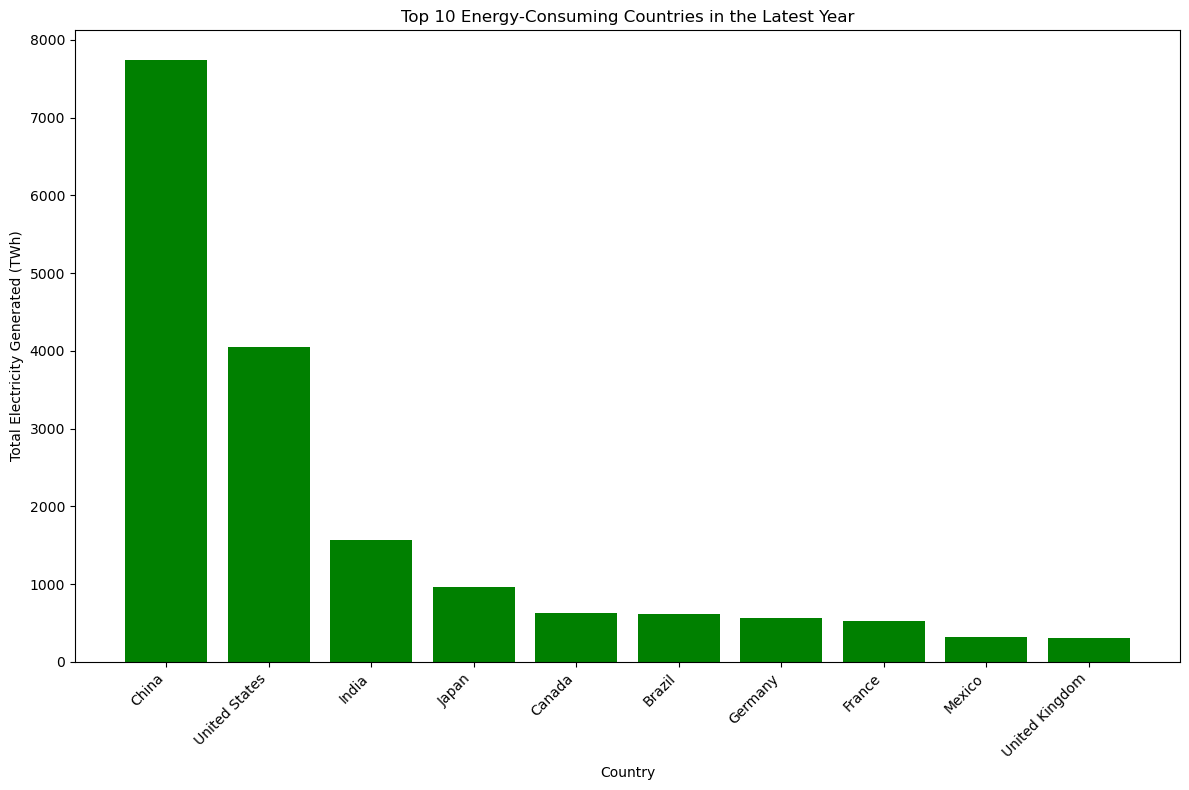

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'global_df' es tu DataFrame principal
# global_df = pd.read_csv('tu_archivo.csv')

# Calculando el total de electricidad generada por cada país en el último año registrado
global_df['Total Electricity (TWh)'] = global_df['Electricity from fossil fuels (TWh)'] + global_df['Electricity from nuclear (TWh)'] + global_df['Electricity from renewables (TWh)']

# Filtrando por el último año disponible para cada país
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()

# Fusionando para obtener solo las filas del último año de cada país
latest_year_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

# Encontrando los 10 países que más electricidad generan
top_countries = latest_year_df.nlargest(10, 'Total Electricity (TWh)')

# Creando el DataFrame con los 10 países que más energía ocupan
top_energy_use_df = top_countries[['Entity', 'Year', 'Total Electricity (TWh)']].reset_index(drop=True)

# Graficando los 10 países que más energía ocupan
plt.figure(figsize=(12, 8))
plt.bar(top_energy_use_df['Entity'], top_energy_use_df['Total Electricity (TWh)'], color='green')
plt.xlabel('Country')
plt.ylabel('Total Electricity Generated (TWh)')
plt.title('Top 10 Energy-Consuming Countries in the Latest Year')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()


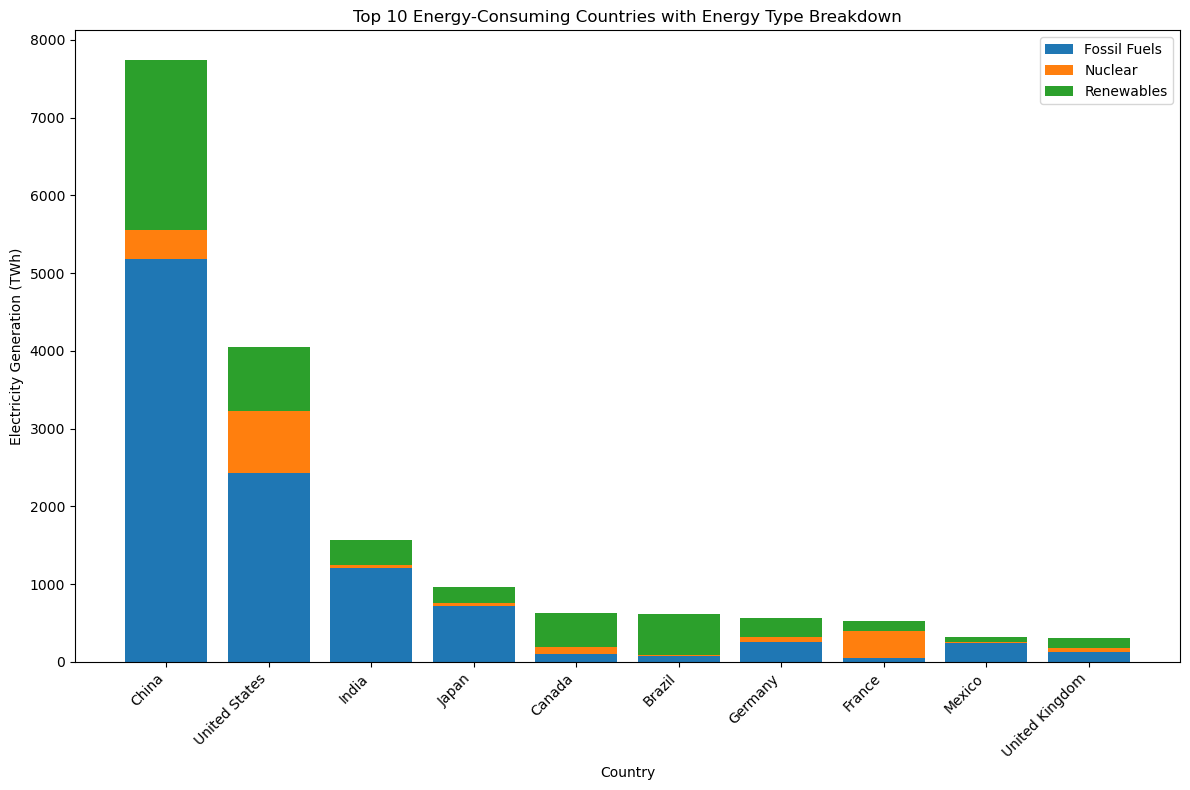

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'global_df' es tu DataFrame principal
# global_df = pd.read_csv('tu_archivo.csv')

# Calculando el total de electricidad generada por cada país en el último año registrado
global_df['Total Electricity (TWh)'] = (global_df['Electricity from fossil fuels (TWh)'] + 
                                         global_df['Electricity from nuclear (TWh)'] + 
                                         global_df['Electricity from renewables (TWh)'])

# Filtrando por el último año disponible para cada país
latest_year_per_country = global_df.groupby('Entity').Year.max().reset_index()

# Fusionando para obtener solo las filas del último año de cada país
latest_year_df = pd.merge(global_df, latest_year_per_country, on=['Entity', 'Year'])

# Encontrando los 10 países que más electricidad generan
top_countries = latest_year_df.nlargest(10, 'Total Electricity (TWh)')

# Graficando los 10 países que más energía ocupan con especificación de los tipos de energía
plt.figure(figsize=(12, 8))

# Creando las barras apiladas para cada tipo de energía
plt.bar(top_countries['Entity'], top_countries['Electricity from fossil fuels (TWh)'], label='Fossil Fuels')
plt.bar(top_countries['Entity'], top_countries['Electricity from nuclear (TWh)'],
        bottom=top_countries['Electricity from fossil fuels (TWh)'], label='Nuclear')
plt.bar(top_countries['Entity'], top_countries['Electricity from renewables (TWh)'],
        bottom=(top_countries['Electricity from fossil fuels (TWh)'] + 
                top_countries['Electricity from nuclear (TWh)']),
        label='Renewables')

plt.xlabel('Country')
plt.ylabel('Electricity Generation (TWh)')
plt.title('Top 10 Energy-Consuming Countries with Energy Type Breakdown')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlap
plt.show()


/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_23069/2399595958.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Total Electricity (TWh)'] = (latest_data['Electricity from fossil fuels (TWh)'] +


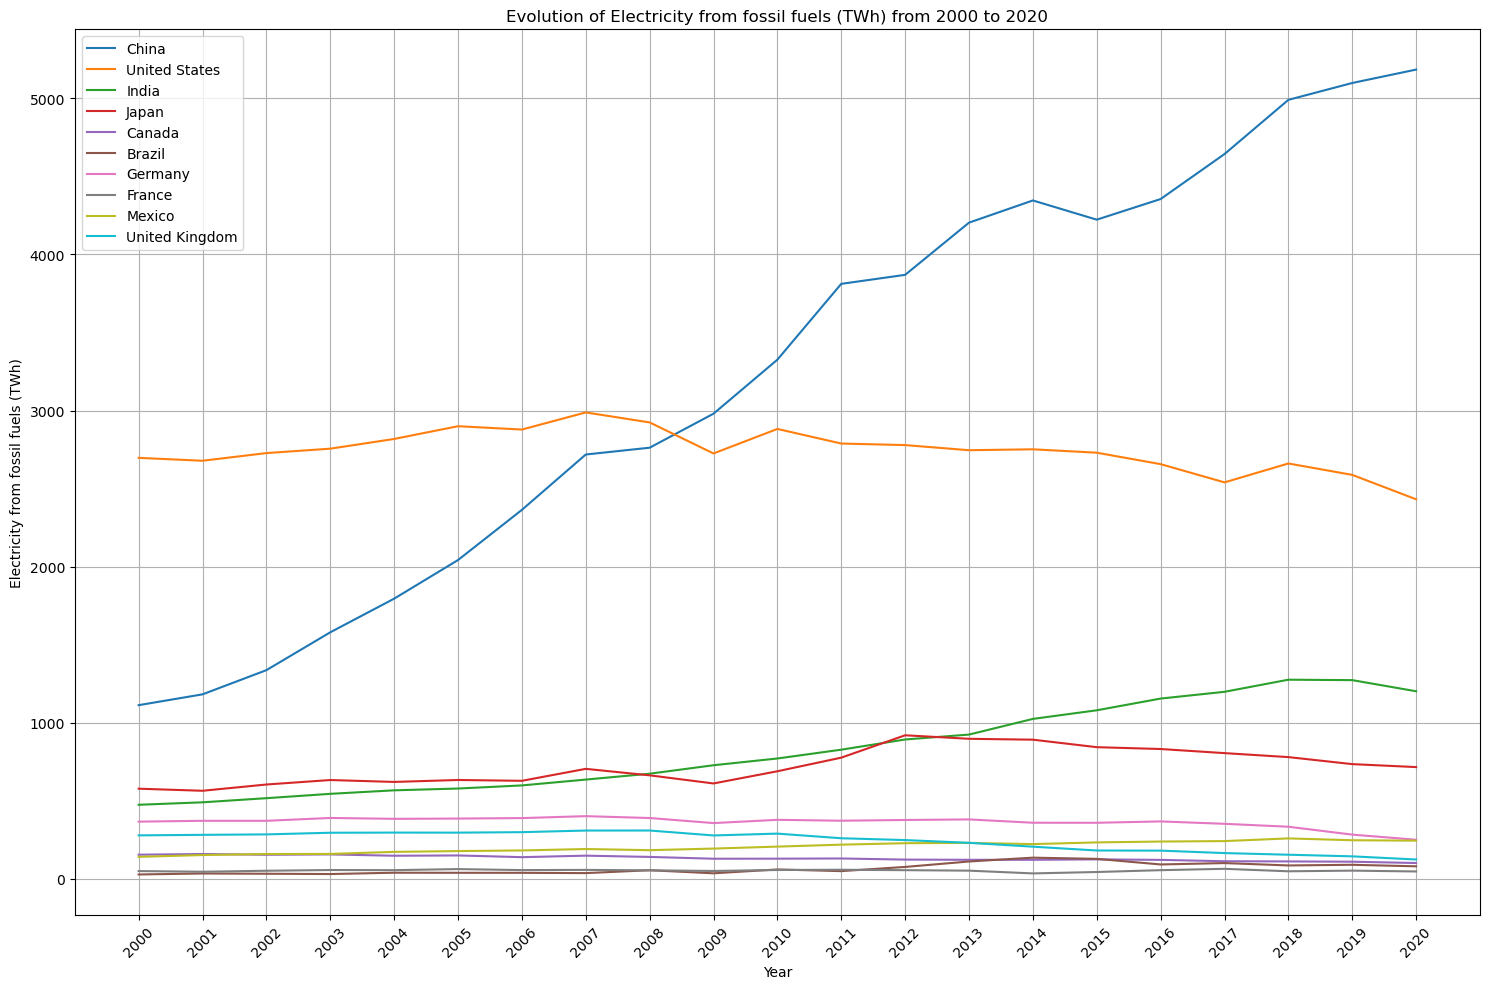

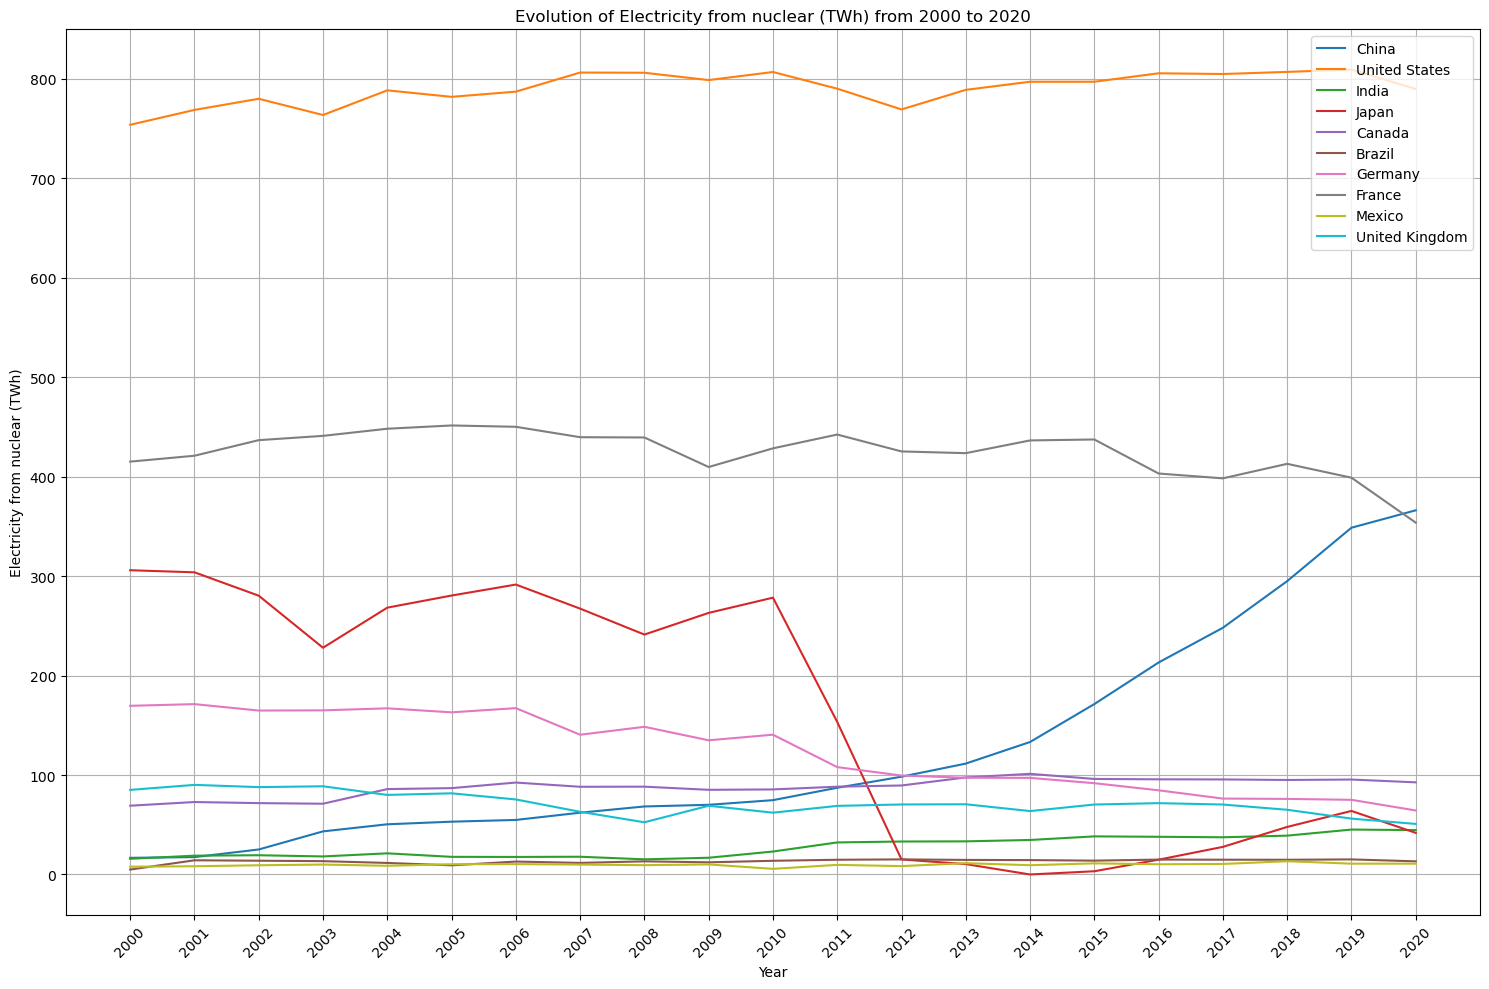

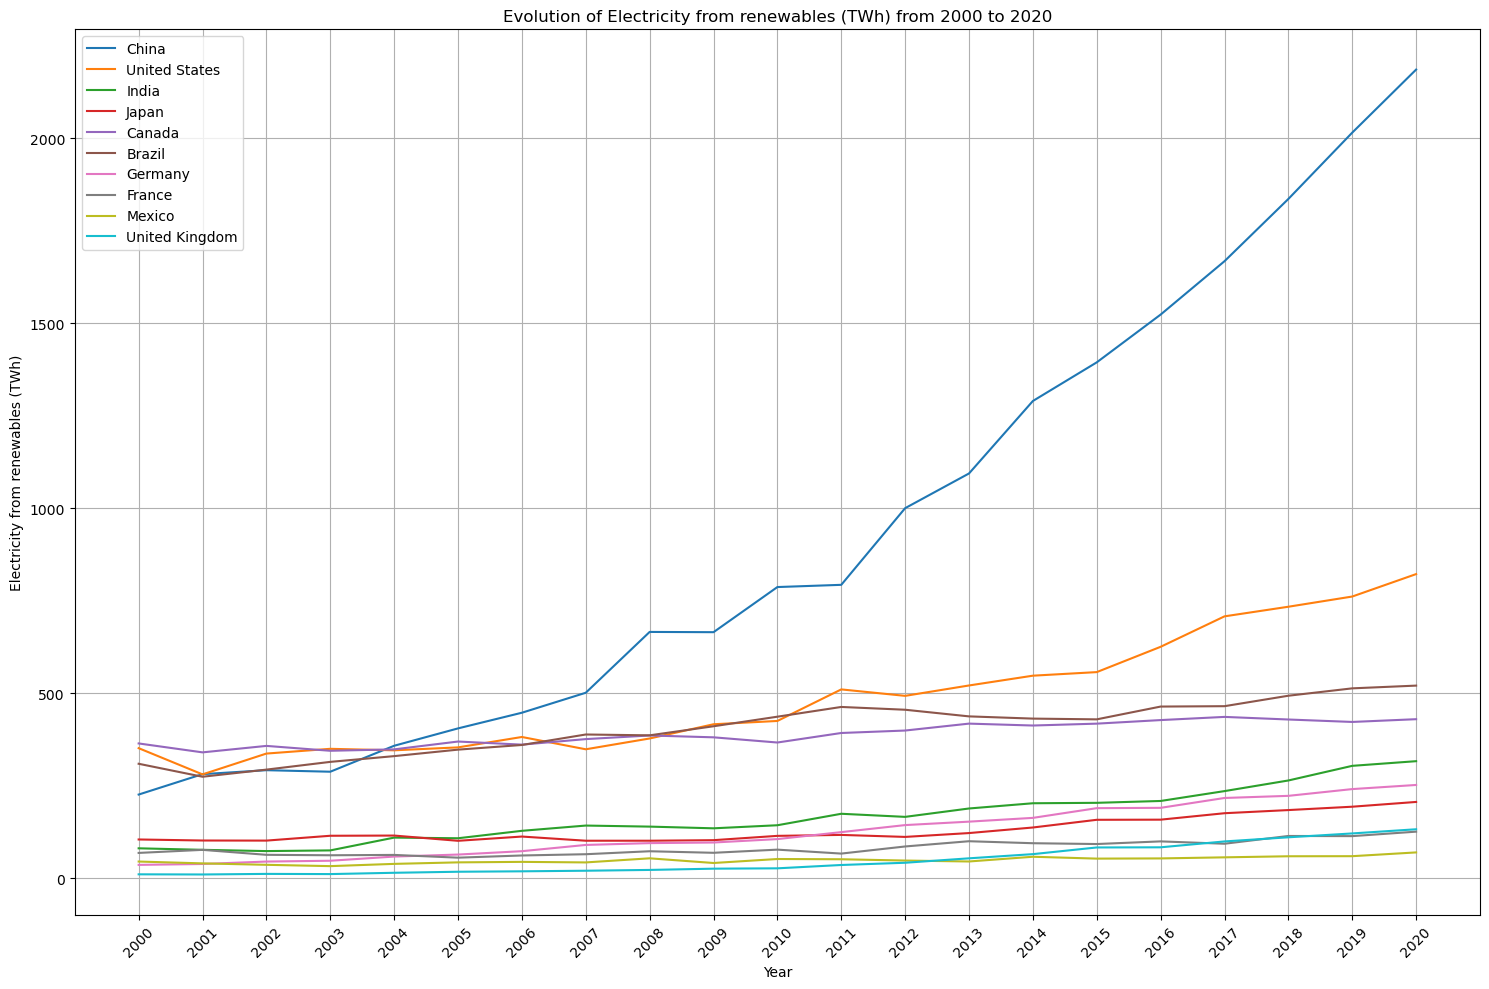

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'global_df' es tu DataFrame principal
# global_df = pd.read_csv('tu_archivo.csv')

# Encuentra el último año de datos disponibles en el DataFrame
latest_year = global_df['Year'].max()

# Filtrando los datos para el año más reciente y calculando el total de electricidad generada
latest_data = global_df[global_df['Year'] == latest_year]
latest_data['Total Electricity (TWh)'] = (latest_data['Electricity from fossil fuels (TWh)'] +
                                           latest_data['Electricity from nuclear (TWh)'] +
                                           latest_data['Electricity from renewables (TWh)'])

# Identificando los 10 países que más energía consumen en el último año disponible
top_countries_latest_year = latest_data.nlargest(10, 'Total Electricity (TWh)')['Entity'].tolist()

# Filtrando el DataFrame global para incluir solo esos 10 países y los años de interés
top_countries_data = global_df[(global_df['Entity'].isin(top_countries_latest_year)) & (global_df['Year'] >= 2000) & (global_df['Year'] <= 2020)]

# Creando un gráfico para cada tipo de energía
for energy_type in ['Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)']:
    plt.figure(figsize=(15, 10))
    
    for country in top_countries_latest_year:
        country_data = top_countries_data[top_countries_data['Entity'] == country]
        plt.plot(country_data['Year'], country_data[energy_type], label=country)

    plt.title(f'Evolution of {energy_type} from 2000 to 2020')
    plt.xlabel('Year')
    plt.ylabel(f'{energy_type}')
    plt.legend()
    plt.xticks(range(2000, 2021, 1), rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


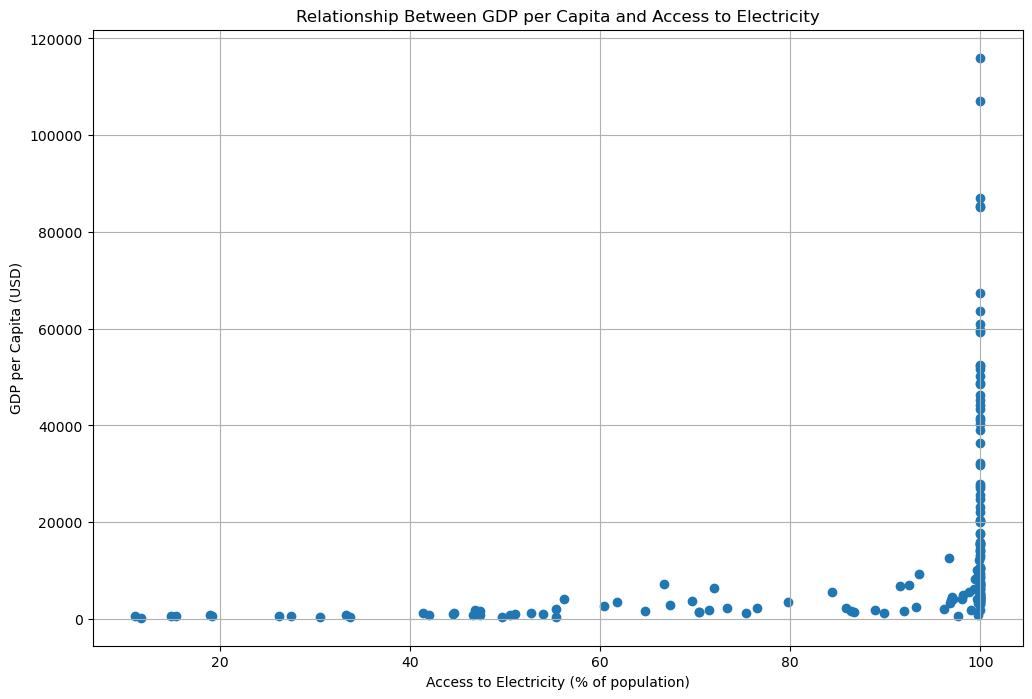

                                         Access to electricity (% of population)  \
Access to electricity (% of population)                                  1.00000   
gdp_per_capita                                                           0.37218   

                                         gdp_per_capita  
Access to electricity (% of population)         0.37218  
gdp_per_capita                                  1.00000  


,Entity,Year,Access to electricity (% of population),gdp_per_capita
0,Afghanistan,2000,1.613591,NaN
1,Afghanistan,2001,4.074574,NaN
2,Afghanistan,2002,9.409158,179.426579
3,Afghanistan,2003,14.738506,190.683814
4,Afghanistan,2004,20.064968,211.382074
...,...,...,...,...
3644,Zimbabwe,2016,42.561730,1464.588957
3645,Zimbabwe,2017,44.178635,1235.189032
3646,Zimbabwe,2018,45.572647,1254.642265
3647,Zimbabwe,2019,46.781475,1316.740657


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'global_df' es tu DataFrame principal
# global_df = pd.read_csv('tu_archivo.csv')

# Seleccionamos solo las columnas relevantes para el análisis
analysis_df = global_df[['Entity', 'Year', 'Access to electricity (% of population)', 'gdp_per_capita']].copy()

# Para realizar una comparación adecuada, seleccionamos los datos del mismo año. Por ejemplo, el último año disponible en el conjunto de datos.
latest_year = analysis_df['Year'].max()
analysis_latest_year_df = analysis_df[analysis_df['Year'] == latest_year]

# Realizando una correlación simple para evaluar la relación
correlation = analysis_latest_year_df[['Access to electricity (% of population)', 'gdp_per_capita']].corr()

# Creando el gráfico de dispersión con los ejes invertidos
plt.figure(figsize=(12, 8))
plt.scatter(analysis_latest_year_df['Access to electricity (% of population)'], analysis_latest_year_df['gdp_per_capita'])

plt.title('Relationship Between GDP per Capita and Access to Electricity')
plt.ylabel('GDP per Capita (USD)')
plt.xlabel('Access to Electricity (% of population)')
plt.grid(True)
plt.show()

# Mostrando el coeficiente de correlación
print(correlation)

analysis_df

In [38]:
# Convirtiendo la columna 'Density' a numérica
analysis_latest_year_df['Density'] = pd.to_numeric(analysis_latest_year_df['Density'], errors='coerce')

# Filtrando el DataFrame para excluir valores de densidad extremadamente altos si es necesario
filtered_df = analysis_latest_year_df[analysis_latest_year_df['Density'] < 10000]

# Continúa con el resto del código para crear el gráfico...


/var/folders/kf/srf7qs1n3rb5q1fmkg0cygxh0000gn/T/ipykernel_23069/2868005645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_latest_year_df['Density'] = pd.to_numeric(analysis_latest_year_df['Density'], errors='coerce')


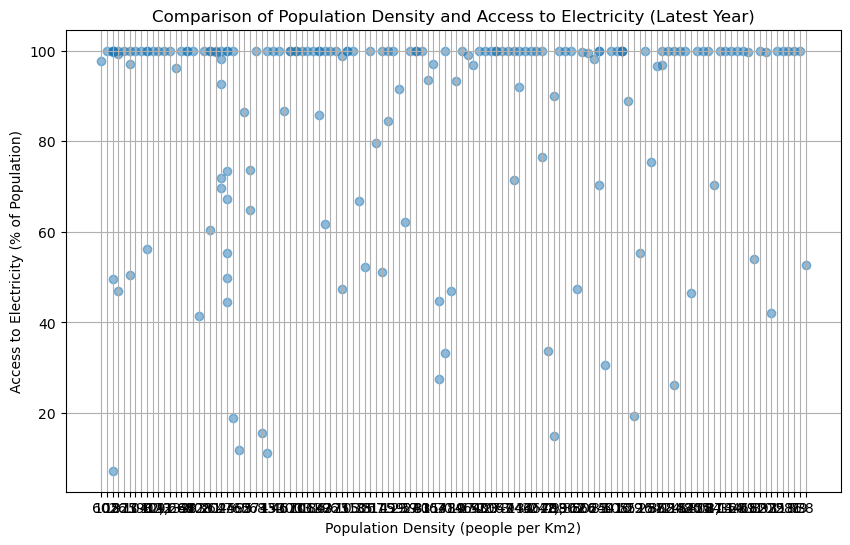

In [39]:
import matplotlib.pyplot as plt

# Asegúrate de que 'analysis_latest_year_df' es el DataFrame que contiene los datos del último año
# y que ya has seleccionado las columnas 'Density' y 'Access to electricity (% of population)'.

# Suponiendo que 'global_df' es tu DataFrame principal y que has modificado la columna de densidad a simplemente 'Density'
latest_year = global_df['Year'].max()
analysis_latest_year_df = global_df[global_df['Year'] == latest_year]

plt.figure(figsize=(10, 6))
plt.scatter(
    analysis_latest_year_df['Density'],
    analysis_latest_year_df['Access to electricity (% of population)'],
    alpha=0.5
)

plt.title('Comparison of Population Density and Access to Electricity (Latest Year)')
plt.xlabel('Population Density (people per Km2)')
plt.ylabel('Access to Electricity (% of Population)')
plt.grid(True)
plt.show()


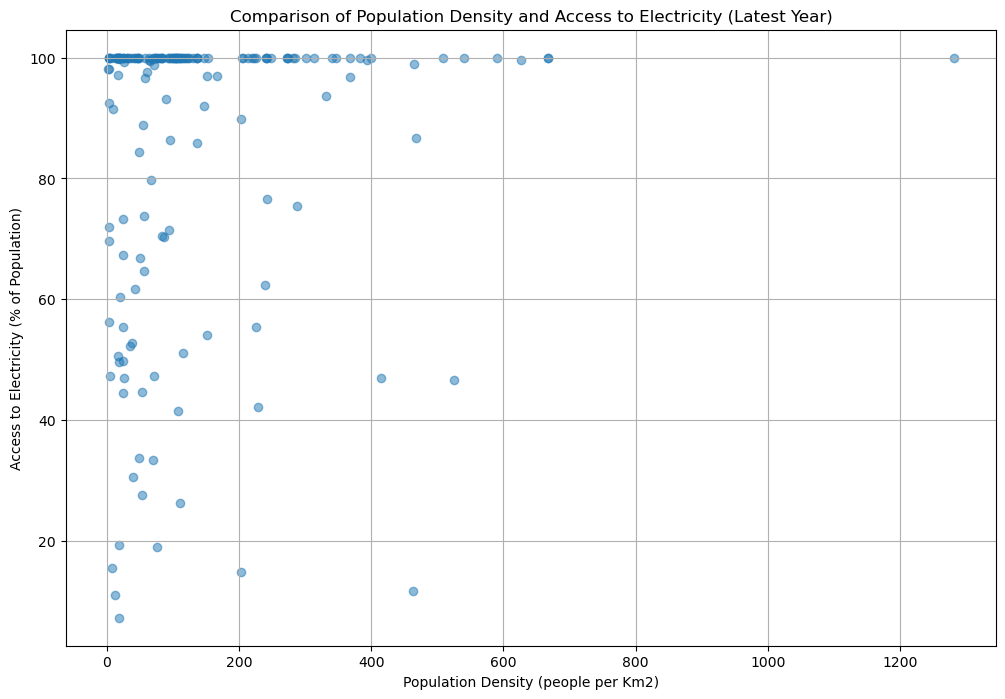

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Creando una copia del DataFrame para evitar el SettingWithCopyWarning
analysis_latest_year_df = global_df[global_df['Year'] == latest_year].copy()

# Convirtiendo la columna 'Density' a numérica y manejando errores con 'coerce'
analysis_latest_year_df['Density'] = pd.to_numeric(analysis_latest_year_df['Density'], errors='coerce')

# Filtrando para excluir valores de densidad extremadamente altos, si es necesario
cutoff = 10000  # Puedes ajustar este valor según tus necesidades
filtered_df = analysis_latest_year_df[analysis_latest_year_df['Density'] < cutoff]

# Graficando la densidad contra el acceso a la electricidad
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df['Density'],
    filtered_df['Access to electricity (% of population)'],
    alpha=0.5
)
plt.xlabel('Population Density (people per Km2)')
plt.ylabel('Access to Electricity (% of Population)')
plt.title('Comparison of Population Density and Access to Electricity (Latest Year)')
plt.grid(True)
plt.show()



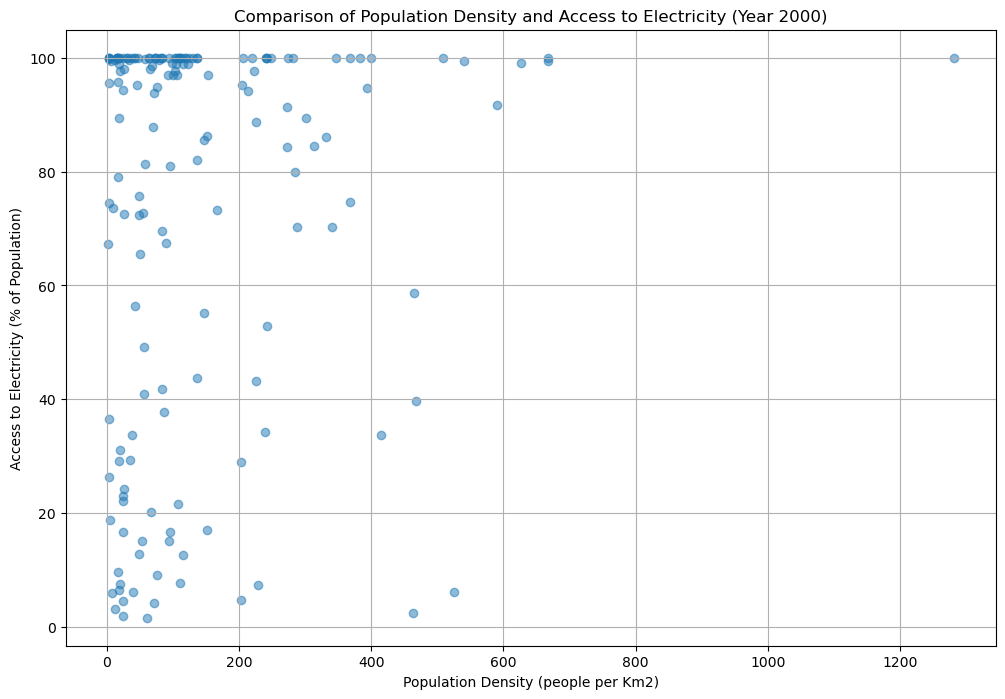

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de que 'global_df' es tu DataFrame principal y que ya ha sido cargado
# Si no, cárgalo usando:
# global_df = pd.read_csv('ruta_a_tu_archivo.csv')

# Filtrando el DataFrame para el año 2000
analysis_year_2000_df = global_df[global_df['Year'] == 2000].copy()

# Convirtiendo la columna 'Density' a numérica si aún no lo es
analysis_year_2000_df['Density'] = pd.to_numeric(analysis_year_2000_df['Density'], errors='coerce')

# Filtrando para excluir valores de densidad extremadamente altos, si es necesario
cutoff = 10000  # Puedes ajustar este valor según tus necesidades
filtered_df_2000 = analysis_year_2000_df[analysis_year_2000_df['Density'] < cutoff]

# Graficando la densidad contra el acceso a la electricidad para el año 2000
plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_df_2000['Density'],
    filtered_df_2000['Access to electricity (% of population)'],
    alpha=0.5
)
plt.xlabel('Population Density (people per Km2)')
plt.ylabel('Access to Electricity (% of Population)')
plt.title('Comparison of Population Density and Access to Electricity (Year 2000)')
plt.grid(True)
plt.show()


In [ ]:
global_df2=global_df.loc["Density(P/Km2)"]

In [ ]:
column_names = global_df.columns.tolist()
column_names

In [ ]:
#¿Cuáles son las tipos de energías que hay y qué países las ocupan?
relevant_columns=global_df.columns.tolist()
relevant_columns

In [ ]:
# Creating a new DataFrame to filter and show the countries that use sustainable energies the most, using 'global_df' as the main DataFrame.

# Selecting relevant columns indicating sustainable energy usage
sustainable_energy_columns = [
    'Entity',  # Country
    'Year',  # Year
    'Access to clean fuels for cooking',  # Access to clean fuels for cooking
    'Renewable-electricity-generating-capacity-per-capita',  # Renewable electricity generating capacity per capita
    'Renewable energy share in the total final energy consumption (%)',  # Renewable energy share in total final energy consumption
    'Electricity from renewables (TWh)',  # Electricity from renewables
    'Low-carbon electricity (% electricity)'  # Low-carbon electricity
]

# Assuming 'global_df' includes all necessary columns
# Filtering for the new DataFrame with the relevant columns
filtered_global_df = global_df[sustainable_energy_columns].copy()

# Calculating medians for the key indicators to use as filters
medians = filtered_global_df[['Renewable-electricity-generating-capacity-per-capita', 'Renewable energy share in the total final energy consumption (%)']].median()

# Filtering countries that surpass both medians
highlighted_countries = filtered_global_df[
    (filtered_global_df['Renewable-electricity-generating-capacity-per-capita'] >= medians['Renewable-electricity-generating-capacity-per-capita']) &
    (filtered_global_df['Renewable energy share in the total final energy consumption (%)'] >= medians['Renewable energy share in the total final energy consumption (%)'])
]

# Showing the first records of the new filtered DataFrame and the calculated medians
highlighted_countries.head(), medians


In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que 'highlighted_countries_sorted' es tu DataFrame filtrado y ordenado
# Ordena tu DataFrame si no lo has hecho aún
highlighted_countries_sorted = highlighted_countries.sort_values(by='Renewable-electricity-generating-capacity-per-capita', ascending=False)

# Preparando los datos para el gráfico
countries = highlighted_countries_sorted['Entity']
capacities = highlighted_countries_sorted['Renewable-electricity-generating-capacity-per-capita']

# Creando el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(countries, capacities, color='skyblue')
plt.xlabel('Renewable Electricity Generating Capacity Per Capita')
plt.ylabel('Country')
plt.title('Top Countries by Renewable Electricity Generating Capacity Per Capita')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar el mayor valor en la parte superior
plt.show()